In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-plot
!pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
!pip install --upgrade tensorflow scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: scikit-image
 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import scikitplot

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from matplotlib import pyplot

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("/content/drive/MyDrive/Autoencoder/Autoencoder-FER-CA/CK+48"))


# Any results you write to the current directory are saved as output

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


import scikitplot

import keras
from keras.models import Model, load_model
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import*
from tensorflow.keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from tqdm import tqdm
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense,Reshape
from keras.models import Model
from matplotlib import pyplot
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea

import random
import scipy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Sadness', 'Surprise']


In [ ]:
data_path = "/content/drive/MyDrive/Autoencoder/Autoencoder-FER-CA/CK+48"
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-Anger

Loaded the images of dataset-Contempt

Loaded the images of dataset-Disgust

Loaded the images of dataset-Fear

Loaded the images of dataset-Happy

Loaded the images of dataset-Sadness

Loaded the images of dataset-Surprise



(981, 48, 48)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #30
labels[135:188]=1 #29
labels[189:365]=2 #32
labels[366:440]=3 #31
labels[441:647]=4 #30
labels[648:731]=5 #31
labels[732:980]=6 #30

names = ['Angry','Contempt','Disgust','Fear','Happy','Sadness','Surprise']

def getLabel(id):
    return ['Angry','Contempt','Disgust','Fear','Happy','Sadness','Surprise'][id]


CLASS_TO_LABEL = {v: k for k, v in enumerate(names)}
N_CLASSES = len(names)

In [ ]:
Y = to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((686, 48, 48), (295, 48, 48), (686, 7), (295, 7))

In [ ]:
X_train = np.reshape(X_train,(-1,48,48,1));
X_test = np.reshape(X_test,(-1,48,48,1));
X_train.shape, X_test.shape

((686, 48, 48, 1), (295, 48, 48, 1))

In [ ]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train.shape,X_test.shape

((686, 48, 48, 1), (295, 48, 48, 1))

In [ ]:
batch_size = 32
epochs = 100
inChannel = 1
x1, y1 = 48, 48
input_img = Input(shape = (x1, y1,1))
num_classes = 7

In [ ]:
def encoder(input_img):
    #encoder
    #input = 48 x 48 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same',name='con1')(input_img)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same',name='con2')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same',name='con3')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same',name='con4')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same',name='con5')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same',name='con6')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same',name='con7')(conv3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same',name='con8')(conv4)
    conv4 = BatchNormalization()(conv4)
    return conv4

def decoder(conv4):
    #decoder
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same',name='den1')(conv4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same',name='den2')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same',name='den3')(conv5)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same',name='den4')(conv6)
    conv6 = BatchNormalization()(conv6)
    up1 = UpSampling2D((2,2))(conv6)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same',name='den5')(up1)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(32, (3, 3), activation='relu', padding='same',name='den6')(conv7)
    conv7 = BatchNormalization()(conv7)
    up2 = UpSampling2D((2,2))(conv7)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same',name='den7')(up2)
    return decoded

In [ ]:
import tensorflow as tf

def SSIMLoss(y_true, y_pred):
  return 1-tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

autoencoder = Model(input_img, decoder(encoder(input_img)))
autoencoder.compile(loss=SSIMLoss, metrics=['accuracy', 'mse'], optimizer = tf.optimizers.Adam(0.001))

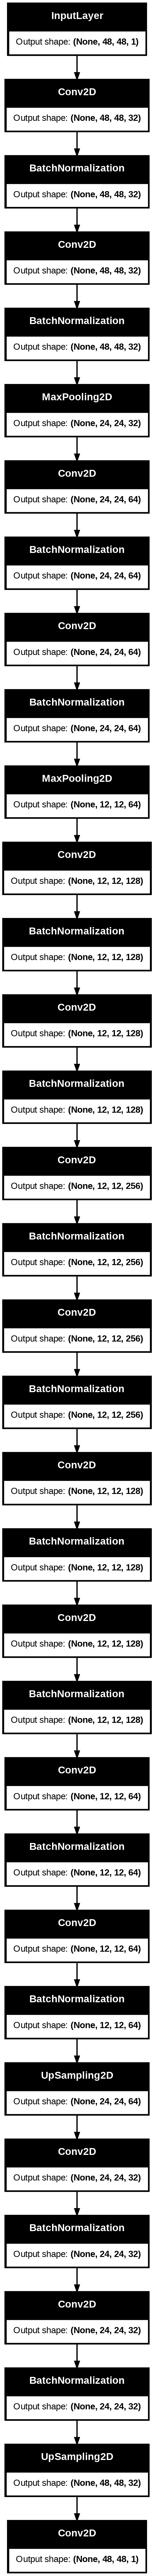

In [ ]:
plot_model(autoencoder, 'autoencoder_no_compress.png', show_shapes=True)

In [ ]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con1 (Conv2D)                        │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con2 (Conv2D)                        │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con3 (Conv2D)                        │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con4 (Conv2D)                        │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con5 (Conv2D)                        │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con6 (Conv2D)                        │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con7 (Conv2D)                        │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con8 (Conv2D)                        │ (None, 12, 12, 256)         │         590,0

 Total params: 1,758,657 (6.71 MB)

 Trainable params: 1,755,841 (6.70 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [ ]:
epochs = 100
batch_size = 32

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.0574 - loss: 0.6001 - mse: 0.0764 - val_accuracy: 0.0694 - val_loss: 0.8579 - val_mse: 0.0823
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0661 - loss: 0.2283 - mse: 0.0180 - val_accuracy: 0.0618 - val_loss: 0.8515 - val_mse: 0.0822
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0663 - loss: 0.1742 - mse: 0.0140 - val_accuracy: 0.0636 - val_loss: 0.8421 - val_mse: 0.0798
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0666 - loss: 0.1454 - mse: 0.0112 - val_accuracy: 0.0686 - val_loss: 0.8383 - val_mse: 0.0798
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0648 - loss: 0.1308 - mse: 0.0103 - val_accuracy: 0.0686 - val_loss: 0.8212 - val_mse: 0.0782
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0609 - loss: 0.1139 - mse: 0.0090 - val_accuracy: 0.0717 - val_loss: 0.7823 - val_mse: 0.0734
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
def plot_performance(history):
    plt.figure(figsize=(5, 5))

    plt.subplot(2, 1, 1)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    #plt.grid()
    plt.title('Convolutional Sparse Autoencoder (CK+)')

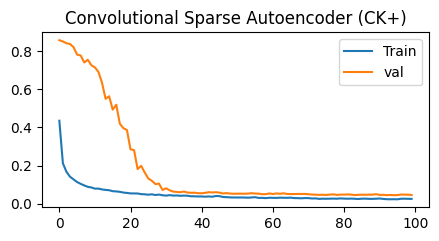

In [ ]:
plot_performance(history)

In [ ]:
decoded_imgs = autoencoder.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB
PSNR value is 73.5527574063535 dB


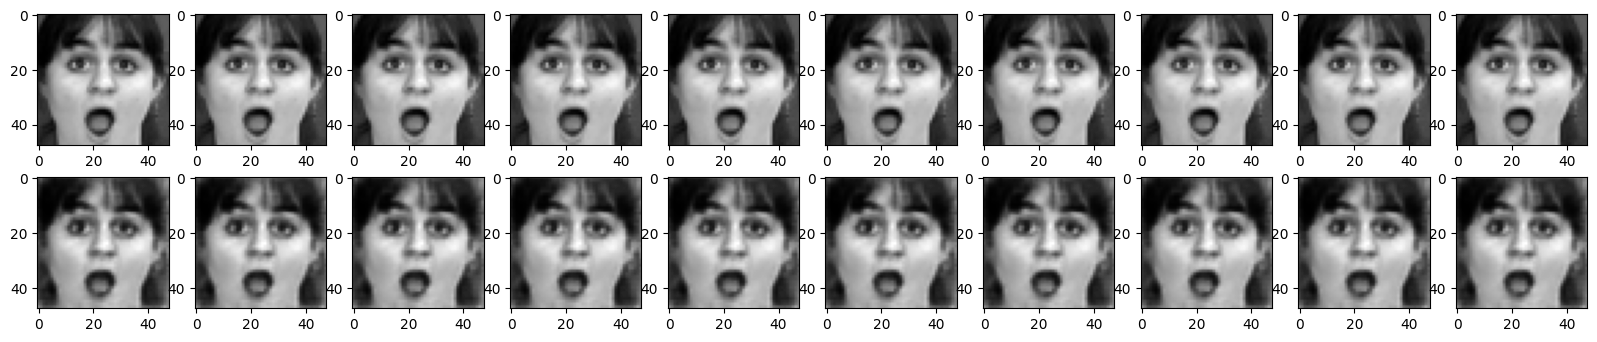

In [ ]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[3].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[3].reshape(48, 48))
    value = PSNR(X_test[20].reshape(48, 48), decoded_imgs[20].reshape(48, 48))
    print(f"PSNR value is {value} dB")
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

plt.show()

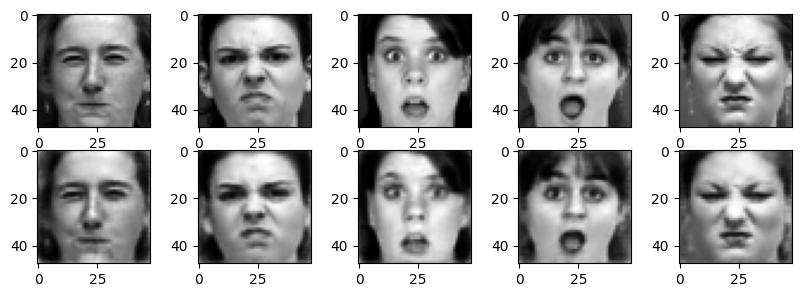

In [ ]:
n = 5
plt.figure(figsize=(10, 5))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)


    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(48, 48))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

plt.show()

In [ ]:
def fc(enco):
    flat = Flatten()(enco)
    den = Dense(128, activation='relu')(flat)
    out = Dense(num_classes, activation='softmax')(den)
    return out

In [ ]:
encode = encoder(input_img)
full_model = Model(input_img,fc(encode))

In [ ]:
full_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=tf.optimizers.Adam(),metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
full_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con1 (Conv2D)                        │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con2 (Conv2D)                        │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con3 (Conv2D)                        │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con4 (Conv2D)                        │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con5 (Conv2D)                        │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con6 (Conv2D)                        │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con7 (Conv2D)                        │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ con8 (Conv2D)                        │ (None, 12, 12, 256)         │         590,0

 Total params: 5,895,143 (22.49 MB)

 Trainable params: 5,893,223 (22.48 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
epochs = 100
batch_size = 32

history = full_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 15s 256ms/step - accuracy: 0.4368 - loss: 3.9363 - precision: 0.4695 - recall: 0.3810 - val_accuracy: 0.0576 - val_loss: 2.0174 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8152 - loss: 0.5567 - precision: 0.8653 - recall: 0.7912 - val_accuracy: 0.0576 - val_loss: 2.6635 - val_precision: 0.0576 - val_recall: 0.0576
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9250 - loss: 0.2347 - precision: 0.9322 - recall: 0.9206 - val_accuracy: 0.0576 - val_loss: 2.8841 - val_precision: 0.0576 - val_recall: 0.0576
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9565 - loss: 0.1767 - precision: 0.9589 - recall: 0.9516 - val_accuracy: 0.0576 - val_loss: 3.0090 - val_precision: 0.0576 - val_recall: 0.0576
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9626 - loss: 0.1477 - precision: 0.9697 - recall: 0.9556 - val_accuracy: 0.0576 - va

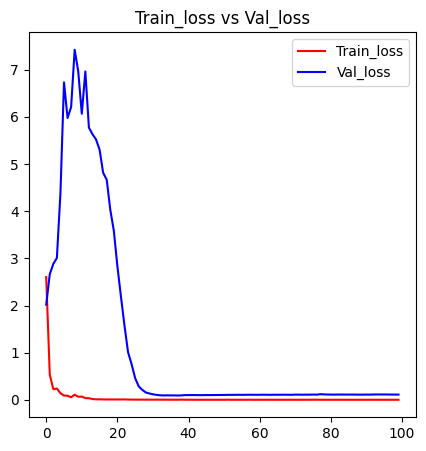

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.figure(figsize=(5, 5))
plt.plot(epochs,train_loss,'r', label='Train_loss')
plt.plot(epochs,val_loss,'b', label='Val_loss')
plt.title('Train_loss vs Val_loss')
plt.legend()

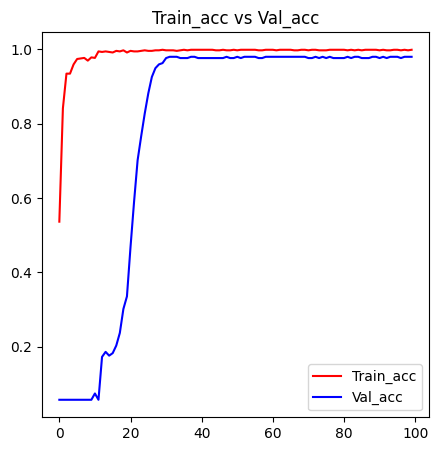

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(epochs,train_acc,'r', label='Train_acc')
plt.plot(epochs,val_acc,'b', label='Val_acc')
plt.title('Train_acc vs Val_acc')
plt.legend()

In [ ]:
test_eval = full_model.evaluate(X_test,y_test, verbose=0)

Test Loss: 0.11181984841823578
Test accuracy: 0.9796609878540039
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


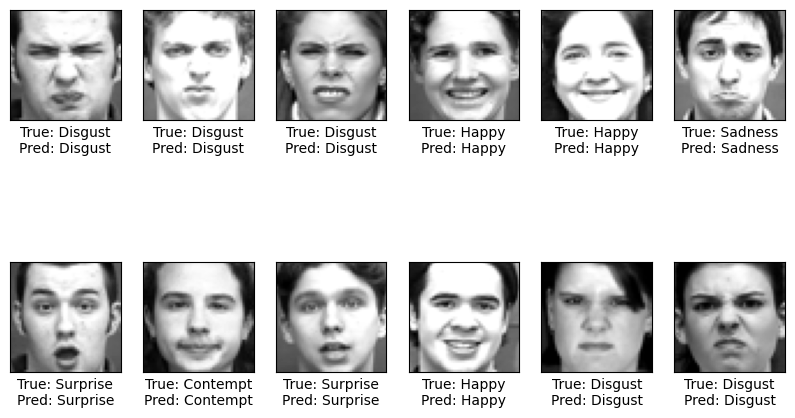

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print('Test Loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Display predictions for 10 images
num_images = 12
start_index = 9
end_index = start_index + num_images

# Use predict method to get probabilities for each class
predictions = full_model.predict(X_test[start_index:end_index])

plt.figure(figsize=(10, 6))

for i in range(num_images):
    plt.subplot(2, 6, i + 1)
    plt.imshow(X_test[start_index + i], cmap=plt.get_cmap('gray'))
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])

    # Get the predicted class for the current image
    predicted_class = np.argmax(predictions[i])

    # Print the true class
    true_class = np.argmax(y_test[start_index + i])
    plt.xlabel(f'True: {getLabel(true_class)}\nPred: {getLabel(predicted_class)}', fontsize=10)

# Show the plot
plt.show()

In [ ]:
full_model.save_weights('.weights.h5')

In [ ]:
#Model Save
full_model.save_weights('.weights.h5')
full_model.save('model_keras.h5')

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11181984841823578
Test accuracy: 0.9796609878540039


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
total wrong validation predictions: 6


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      0.94      0.91        17
           2       1.00      1.00      1.00        63
           3       1.00      0.82      0.90        17
           4       1.00      1.00      1.00        59
           5       0.93      1.00      0.97        14
           6       0.96      0.99      0.98        82

    accuracy                           0.98       295
   macro avg       0.97      0.96      0.96       295
weighted avg       0.98      0.98      0.98       295



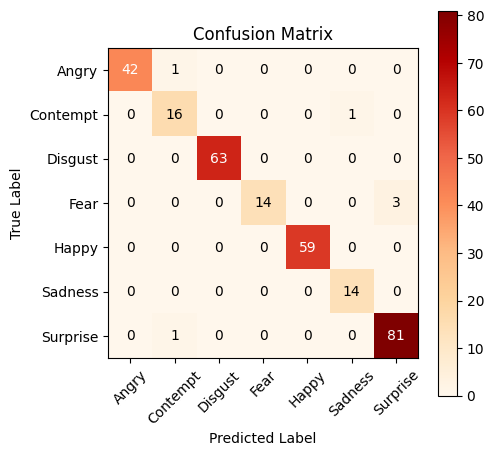

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
import scikitplot as skplt
import numpy as np

classNames = ['Angry','Contempt','Disgust','Fear','Happy','Sadness','Surprise']
tick_marks = np.arange(len(classNames))

predict_x = full_model.predict(X_test)
yhat_valid = np.argmax(predict_x, axis=1)

# Set your desired color map using the `cmap` parameter
skplt.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(5, 5), cmap='OrRd')

# Save the plot
plt.savefig("confusion_matrix.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))

plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
total wrong validation predictions: 6


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.89      0.94      0.91        17
           2       1.00      1.00      1.00        63
           3       1.00      0.82      0.90        17
           4       1.00      1.00      1.00        59
           5       0.93      1.00      0.97        14
           6       0.96      0.99      0.98        82

    accuracy                           0.98       295
   macro avg       0.97      0.96      0.96       295
weighted avg       0.98      0.98      0.98       295



Text(0.5, 63.222222222222186, 'Predicted')

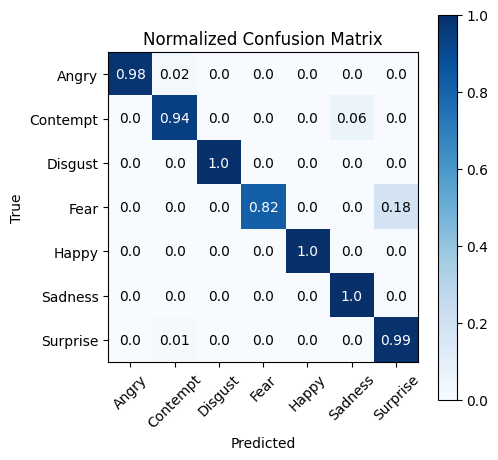

In [ ]:
from matplotlib import pyplot as plt
classNames=['Angry','Contempt','Disgust','Fear','Happy','Sadness','Surprise']
tick_marks = np.arange(len(classNames))

predict_x=full_model.predict(X_test)
yhat_valid=np.argmax(predict_x,axis=1)
scikitplot.metrics.plot_confusion_matrix(np.argmax(y_test, axis=1), yhat_valid, figsize=(5,5),normalize='true')
pyplot.savefig("confusion_matrix 2.png")

print(f'total wrong validation predictions: {np.sum(np.argmax(y_test, axis=1) != yhat_valid)}\n\n')
print(classification_report(np.argmax(y_test, axis=1), yhat_valid))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle
new_label = ['Angry','Contempt','Disgust','Fear','Happy','Sadness','Surprise']
final_label = new_label
new_class = 7
y_pred = full_model.predict(X_test)
y_pred_ravel = y_pred.ravel()
lw = 2

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


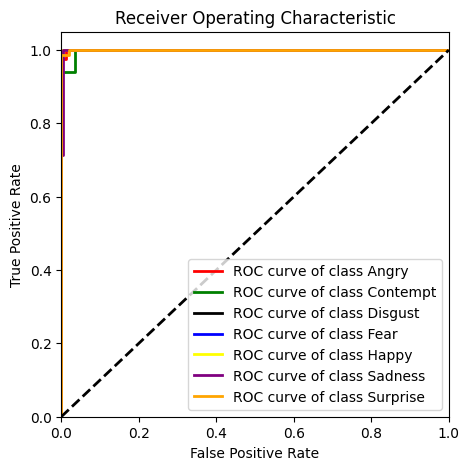

<Figure size 2000x1000 with 0 Axes>

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure(figsize=(5, 5))

for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
pyplot.savefig("Roc.png")
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
pyplot.savefig("Roc.png")